In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [43]:
dataset = pd.read_csv('data/stud.csv')

In [44]:
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [45]:
dataset.shape

(1000, 8)

In [46]:
dataset.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [47]:
dataset.duplicated().sum()

0

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:
dataset.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [50]:
dataset.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<h1>Categories in Each Column</h1>

In [51]:
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [52]:
print("Categories in Gender Column : ")
print(dataset['gender'].unique())


print("Categories in Race Ethnicity Column : ")
print(dataset['race_ethnicity'].unique())

print("Categories in Parental Level of Education Column : ")
print(dataset['parental_level_of_education'].unique())

print("Categories in Lunch Column : ")
print(dataset['lunch'].unique())

print("Categories in Test Prepration Course Column : ")
print(dataset['test_preparation_course'].unique())

Categories in Gender Column : 
['female' 'male']
Categories in Race Ethnicity Column : 
['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Parental Level of Education Column : 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in Lunch Column : 
['standard' 'free/reduced']
Categories in Test Prepration Course Column : 
['none' 'completed']


In [53]:
dataset.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [54]:
numerical_features = [features for features in dataset.columns if dataset[features].dtype != 'O']
categorical_features = [features for features in dataset.columns if dataset[features].dtype == 'O']

print("In the dataset we have {} numerical features : {}".format(len(numerical_features),numerical_features))
print("We have {} categorical features : {}".format(len(categorical_features),categorical_features))

In the dataset we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [55]:
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [56]:
dataset['total_score'] = dataset['math_score'] + dataset['reading_score'] + dataset['writing_score']
dataset['average'] = dataset['total_score']/3
dataset


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [57]:
math_100 = dataset[dataset['math_score'] == 100]['average'].count()
reading_100 = dataset[dataset['reading_score'] == 100]['average'].count()
writing_100 = dataset[dataset['writing_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_100}')
print(f'Number of students with full marks in Writing: {writing_100}')
print(f'Number of students with full marks in Reading: {reading_100}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [58]:
math_less_20 = dataset[dataset['math_score'] <20]['average'].count()
reading_less_20 = dataset[dataset['reading_score'] <20]['average'].count()
writing_less_20 = dataset[dataset['writing_score'] <20]['average'].count()
print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


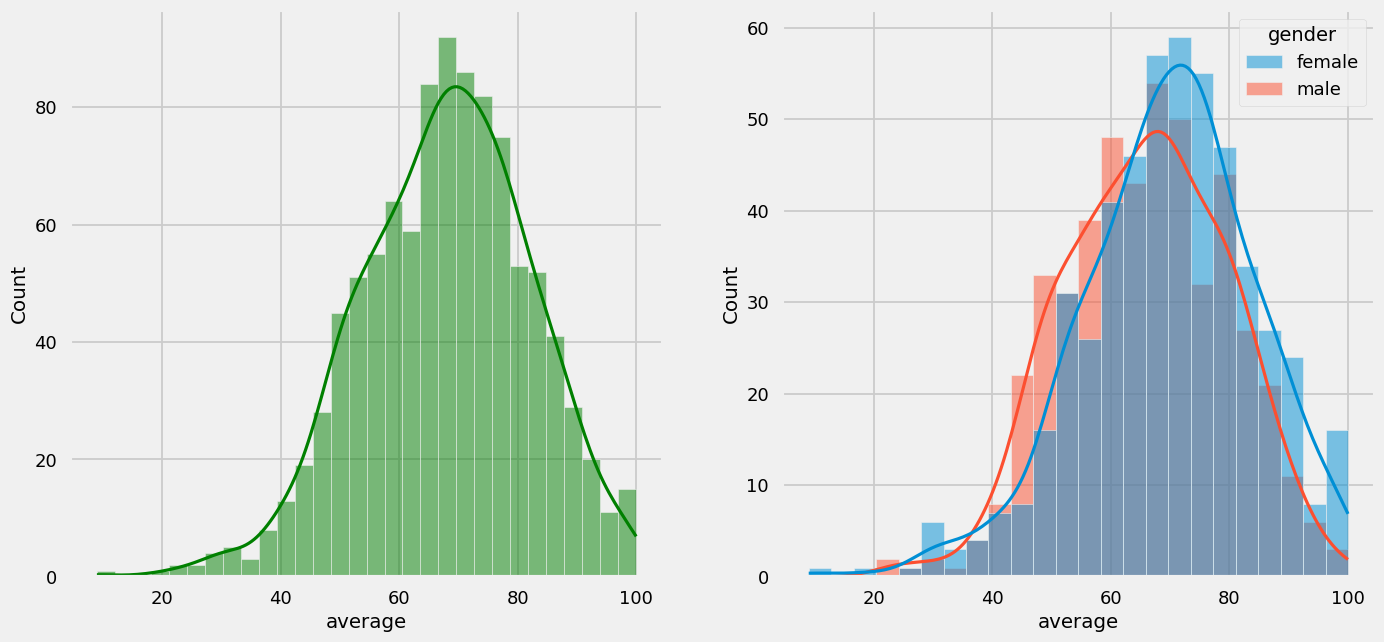

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=dataset,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=dataset,x='average',kde=True,hue='gender')
plt.show() 

Inference : Female are better in study compared to male

In [60]:
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


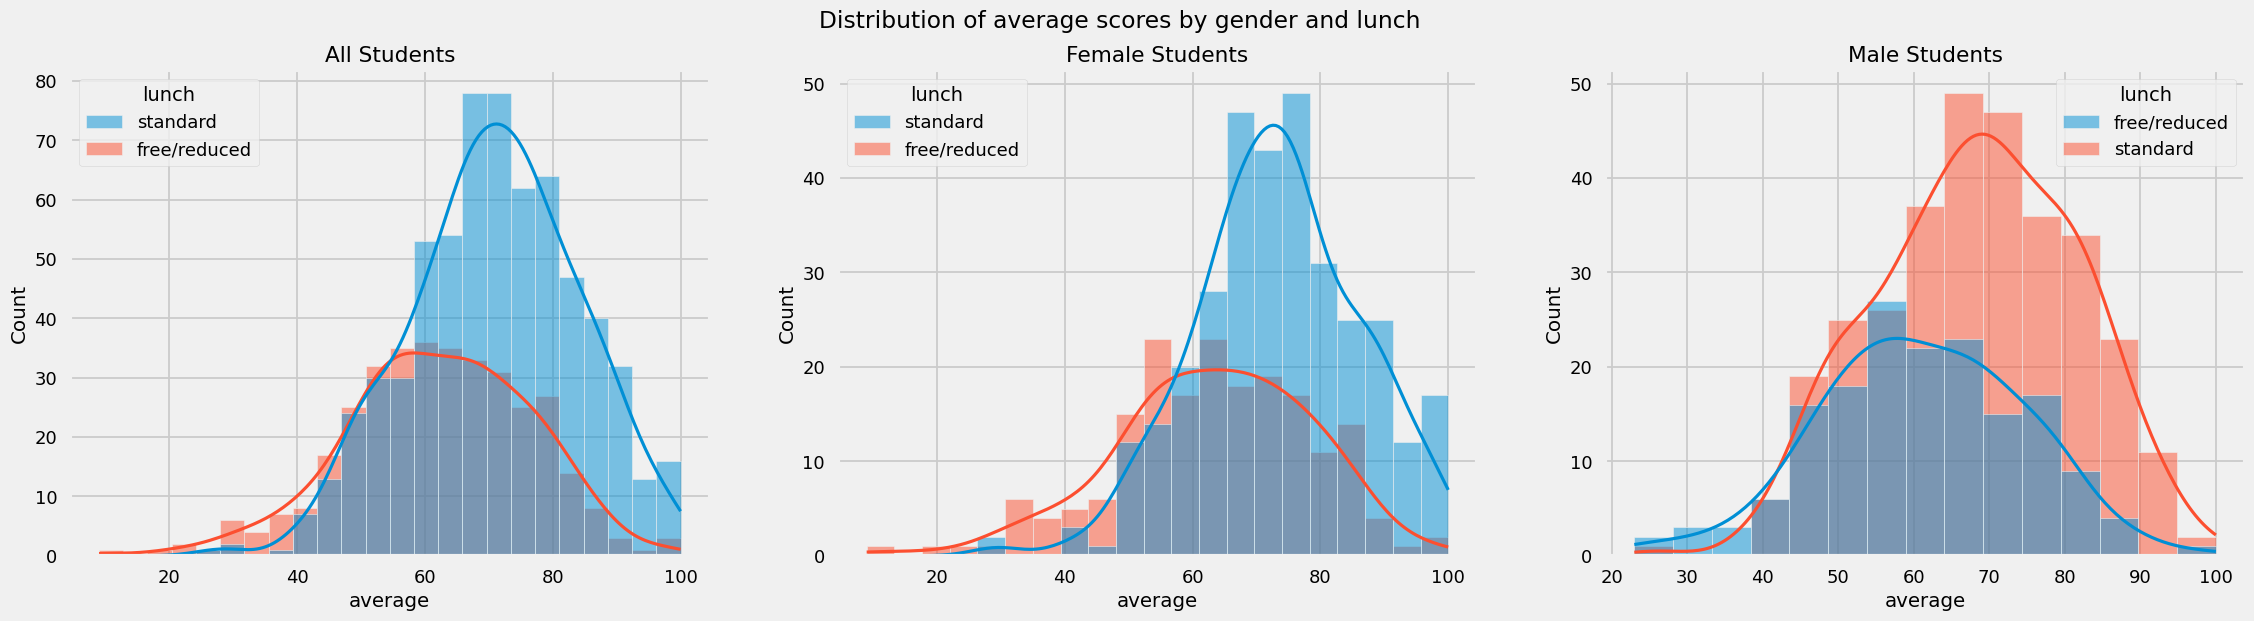

In [61]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=dataset,x='average',hue='lunch',kde=True)
plt.title('All Students')
plt.subplot(132)
sns.histplot(data=dataset[dataset.gender=='female'],x='average',hue='lunch',kde=True)
plt.title('Female Students')
plt.subplot(133)
sns.histplot(data=dataset[dataset.gender=='male'],x='average',hue='lunch',kde=True)
plt.title('Male Students')
fig.suptitle('Distribution of average scores by gender and lunch')
plt.show()

Inference : 
Standard lunch help students perform well

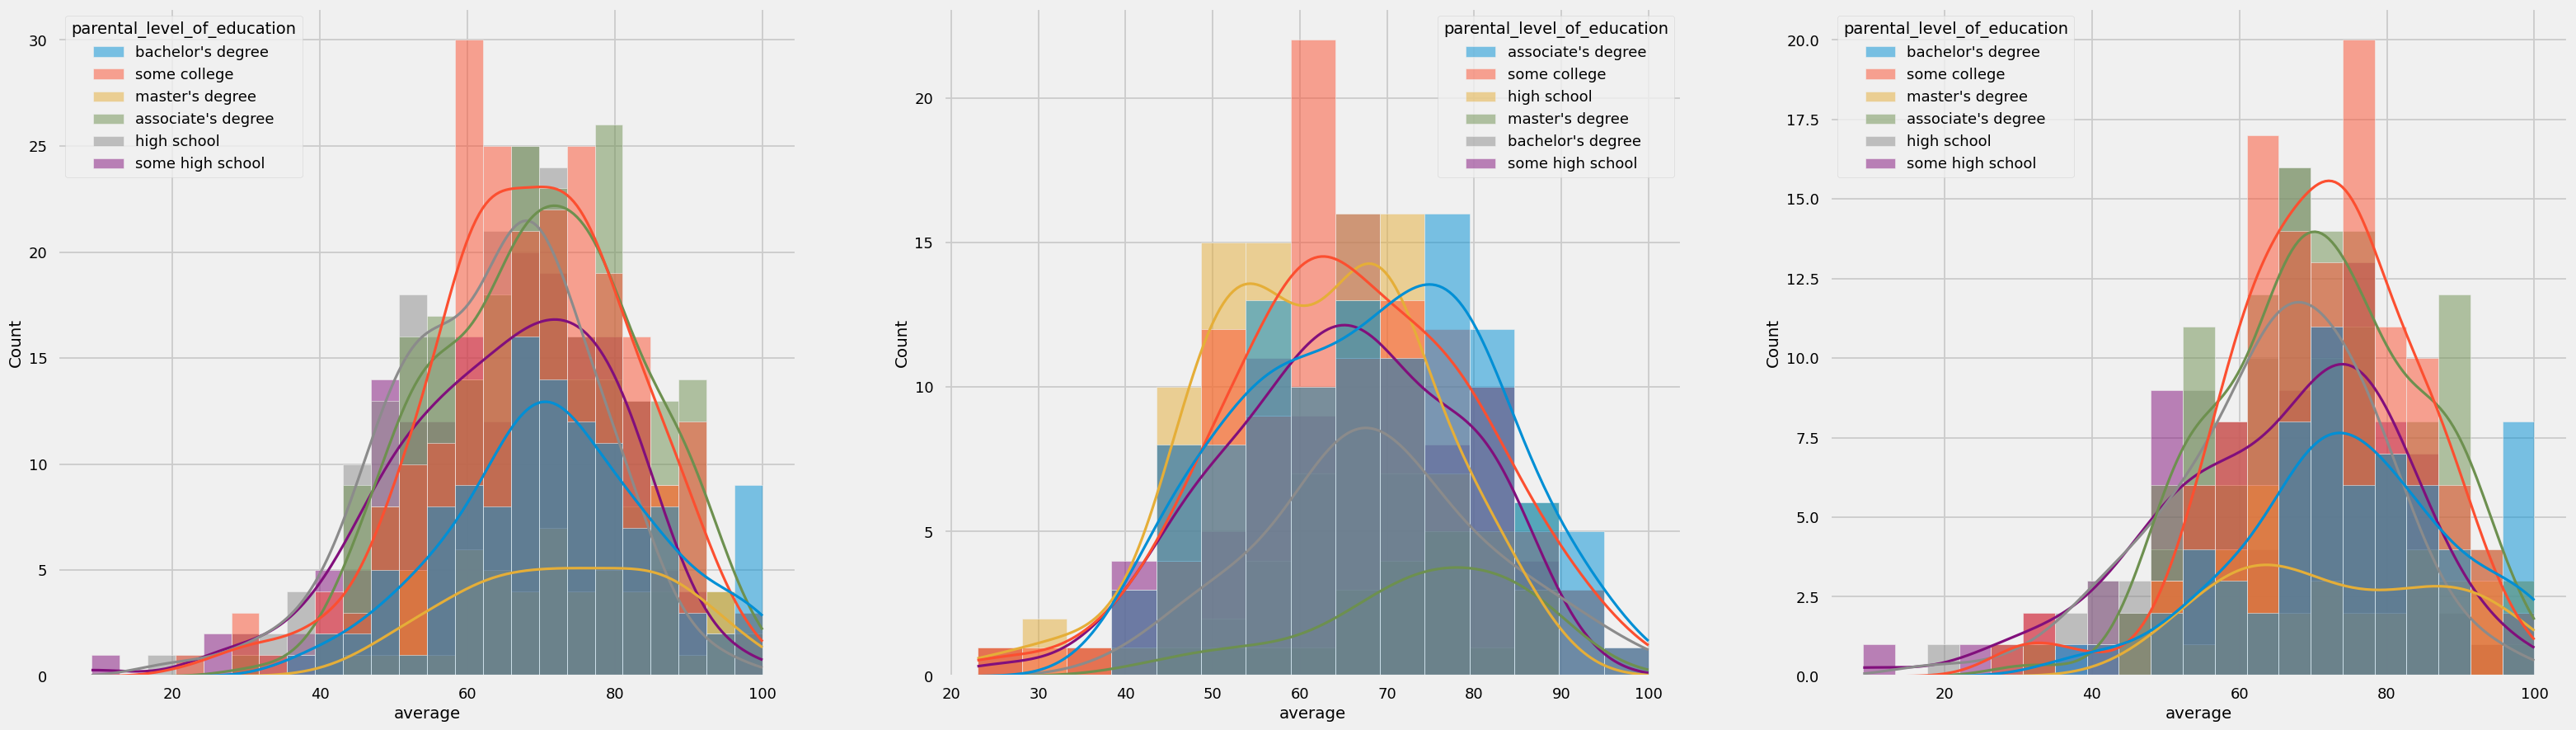

In [62]:
fig,axes = plt.subplots(1,3,figsize=(35,10))
plt.subplot(1,3,1)
sns.histplot(data=dataset,x='average',hue='parental_level_of_education',kde=True)

plt.subplot(1,3,2)
sns.histplot(data=dataset[dataset.gender=='male'],x='average',hue='parental_level_of_education',kde=True)

plt.subplot(1,3,3)
sns.histplot(data=dataset[dataset.gender=='female'],x='average',hue='parental_level_of_education',kde=True)
plt.show()

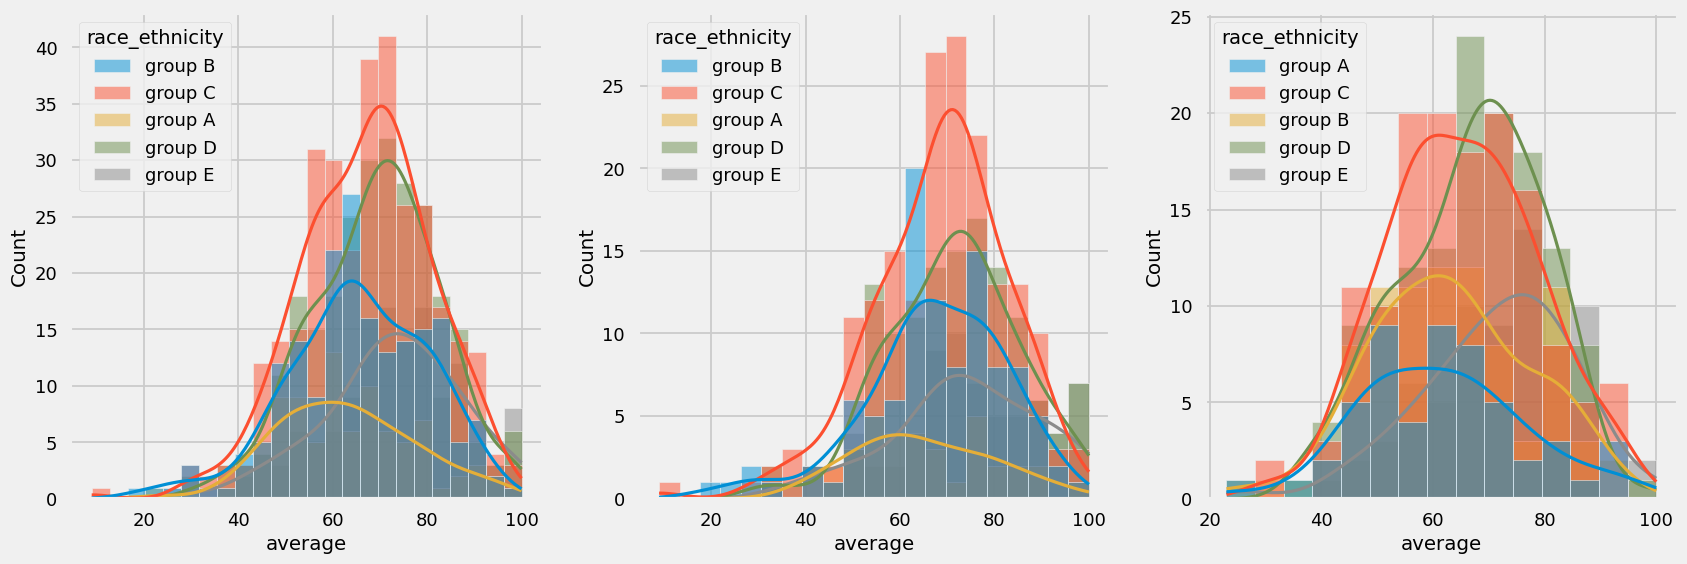

In [63]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=dataset,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=dataset[dataset.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=dataset[dataset.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

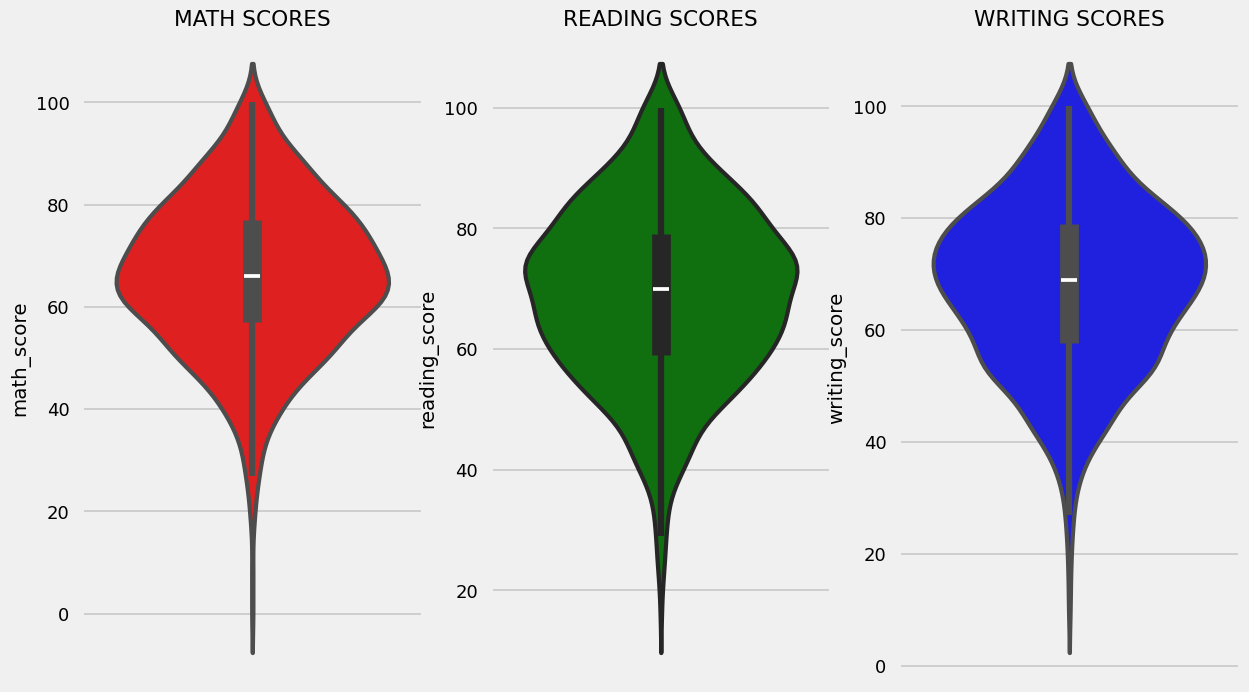

In [64]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=dataset,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=dataset,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=dataset,color='blue',linewidth=3)
plt.show()

multivariate analysis using pieplot

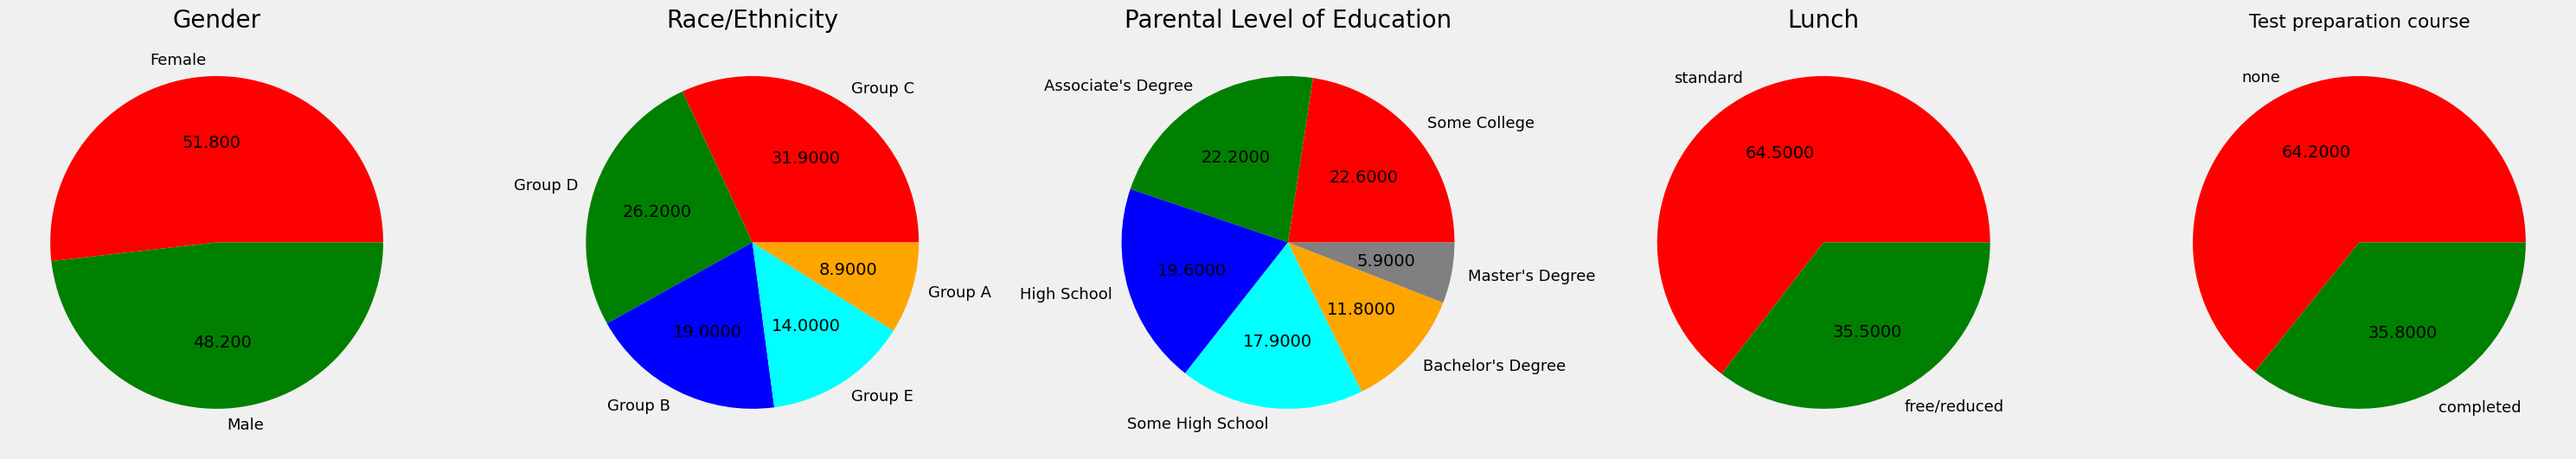

In [65]:
plt.rcParams['figure.figsize'] = (30,12)
plt.subplot(1,5,1)
size=dataset['gender'].value_counts()
labels='Female','Male'
color=['red','green']


plt.pie(size,colors=color,labels=labels,autopct='%.3f')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=dataset['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='%.4f')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=dataset['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='%.4f')
plt.title('Parental Level of Education',fontsize=20)
plt.axis('off')


plt.subplot(1,5,4)
size=dataset['lunch'].value_counts()
labels='standard','free/reduced'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%.4f')
plt.title('Lunch',fontsize=20)
plt.axis('off')


plt.subplot(1,5,5)
size=dataset['test_preparation_course'].value_counts()
labels='none','completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%.4f')
plt.title('Test preparation course')
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

univariate analysis

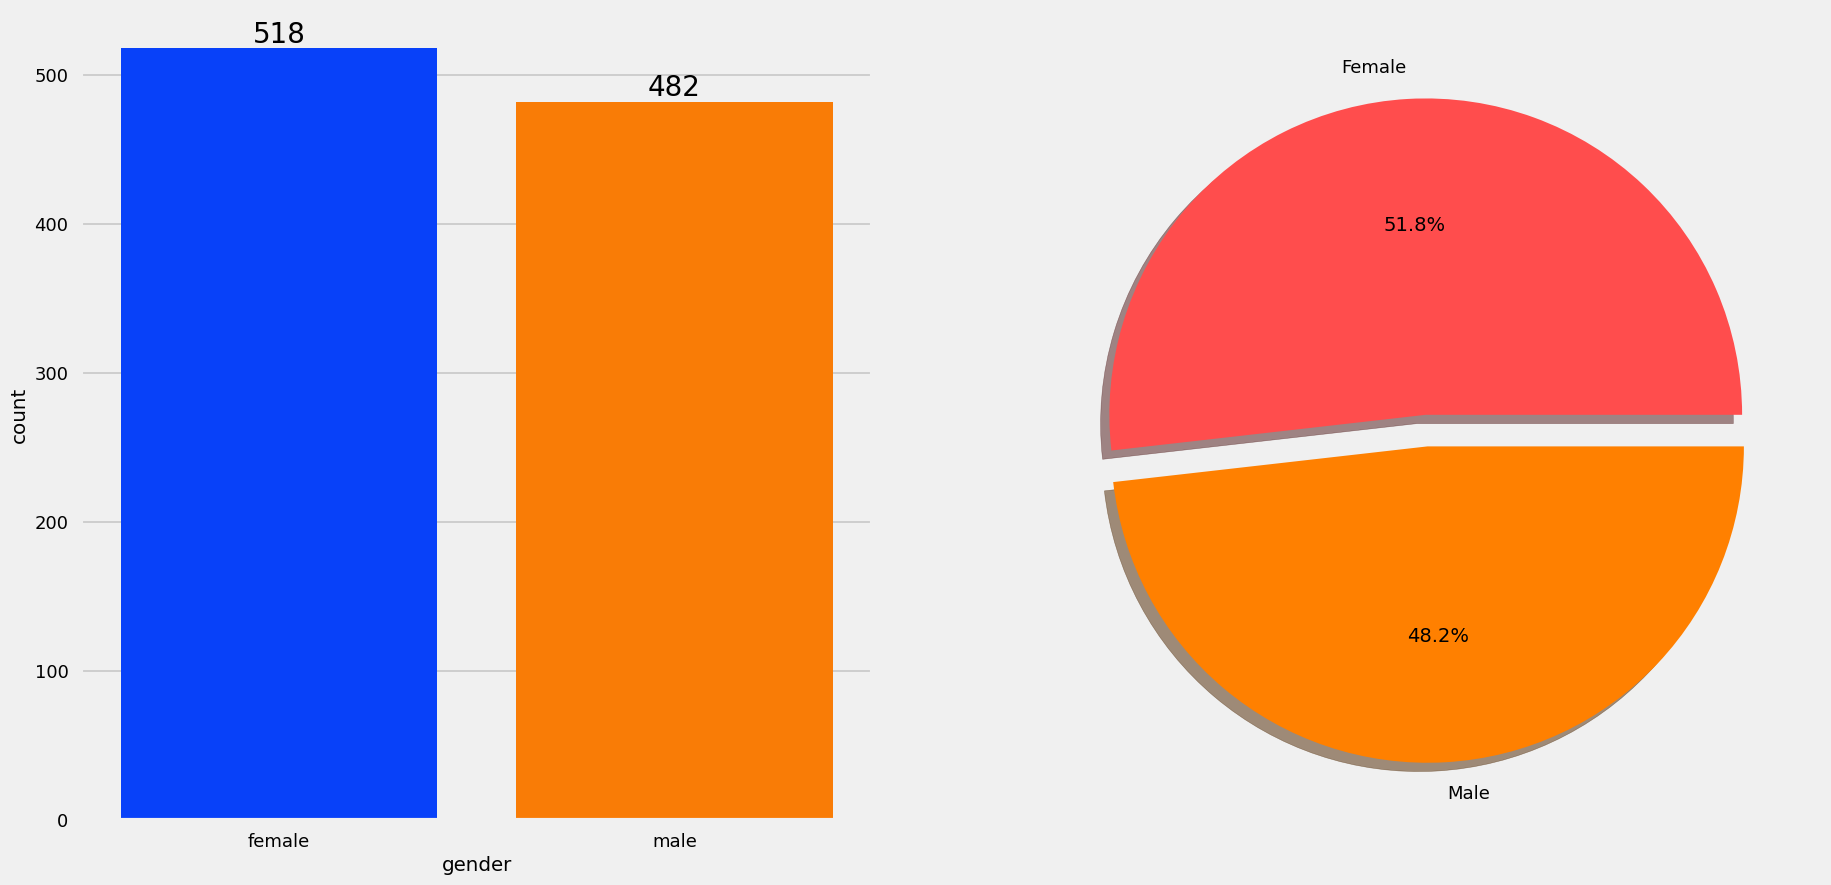

In [66]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=dataset['gender'],data=dataset,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=dataset['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Bivariate Analysis

In [67]:
gender_group = dataset.set_index('gender').groupby(level=0)[['math_score','reading_score','writing_score','average']].agg('mean')
gender_group

,math_score,reading_score,writing_score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


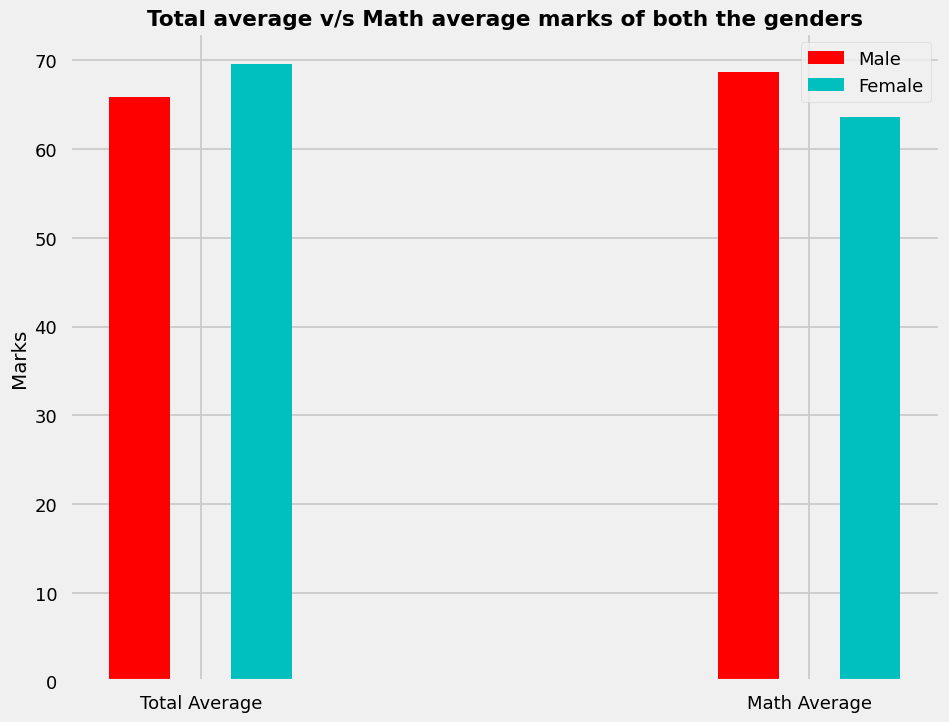

In [68]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, male_scores, 0.1, label = 'Male',color='r')
plt.bar(X_axis + 0.1, female_scores, 0.1, label = 'Female',color='c')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Univariate Analysis

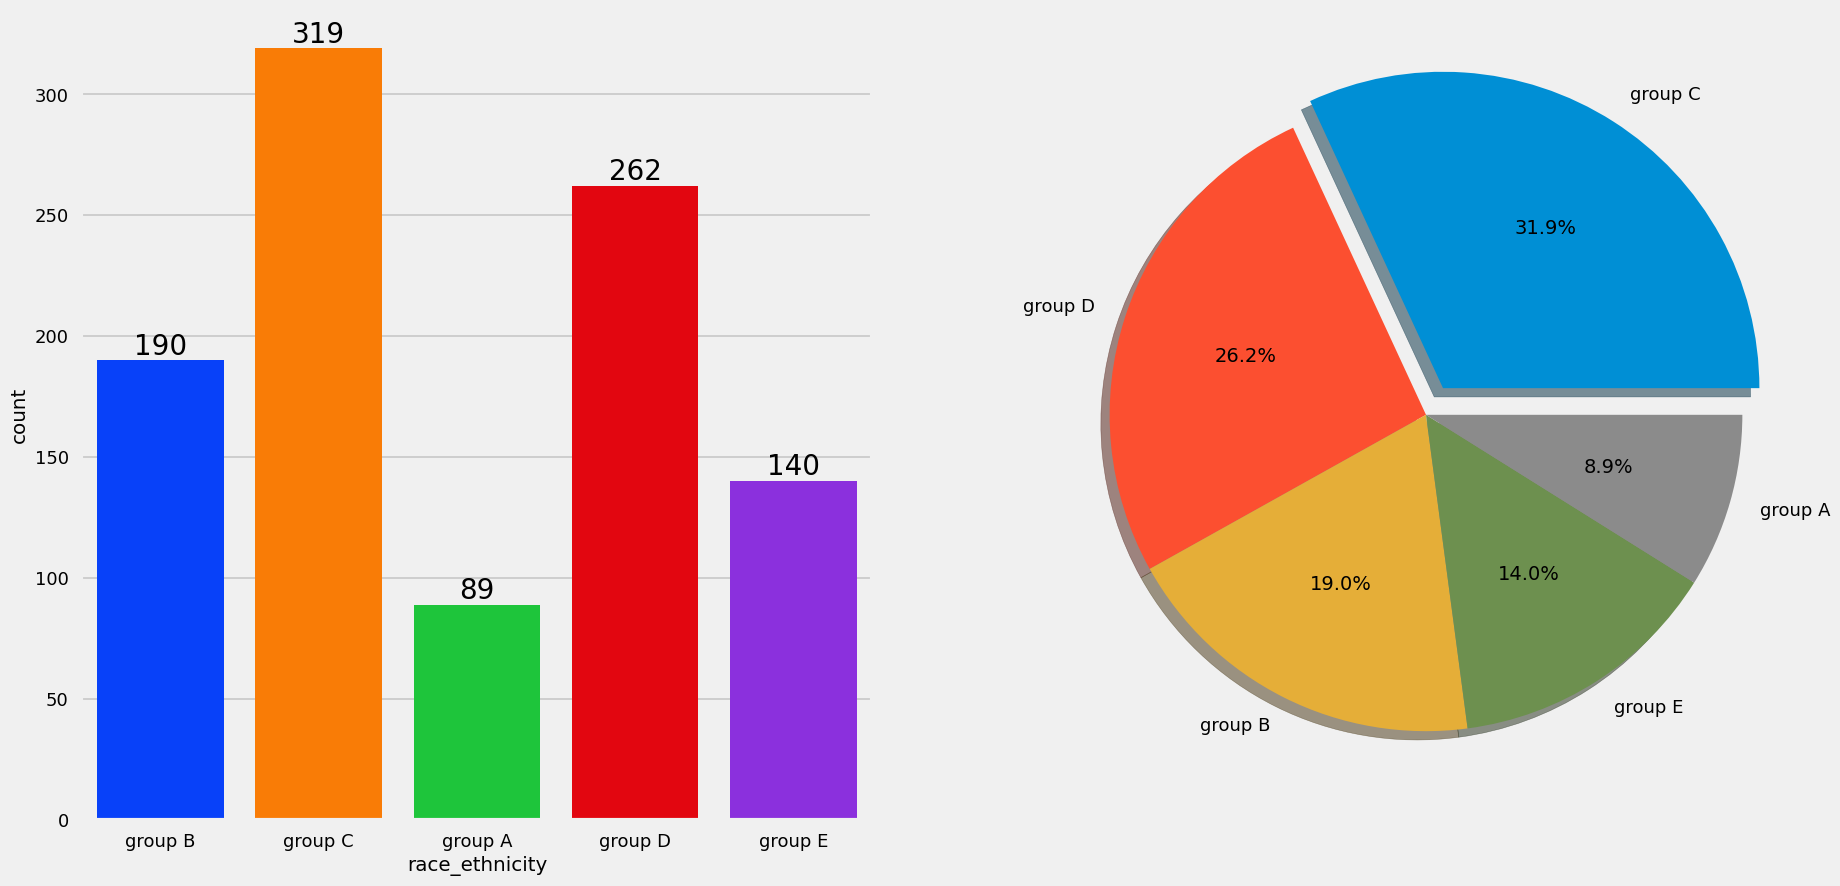

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=dataset['race_ethnicity'],data=dataset,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = dataset['race_ethnicity'].value_counts(),labels=dataset['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

bivariate

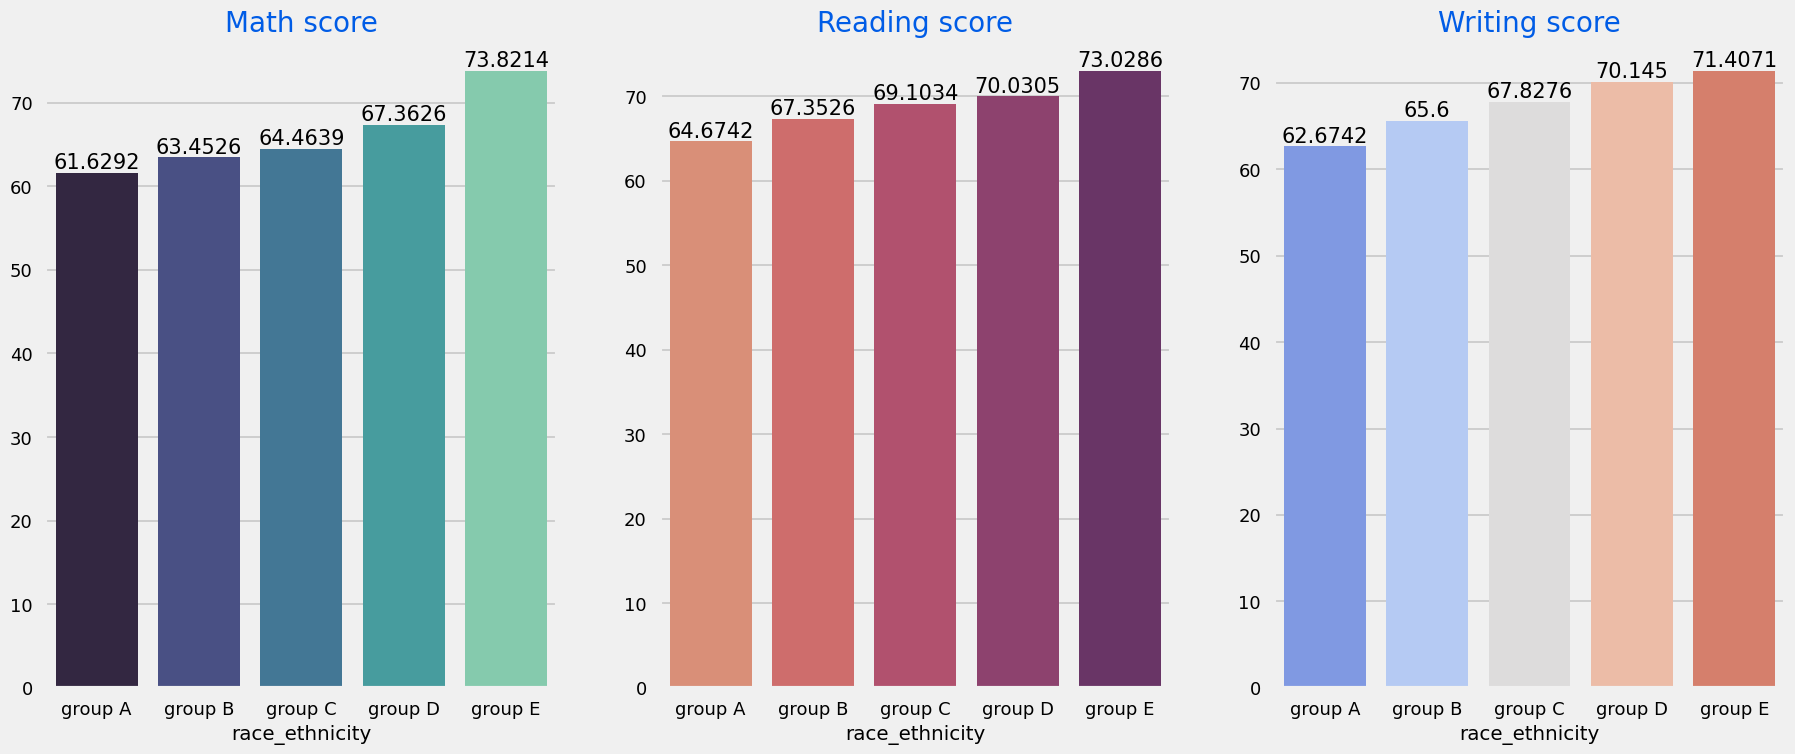

In [70]:
Group_data2=dataset.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

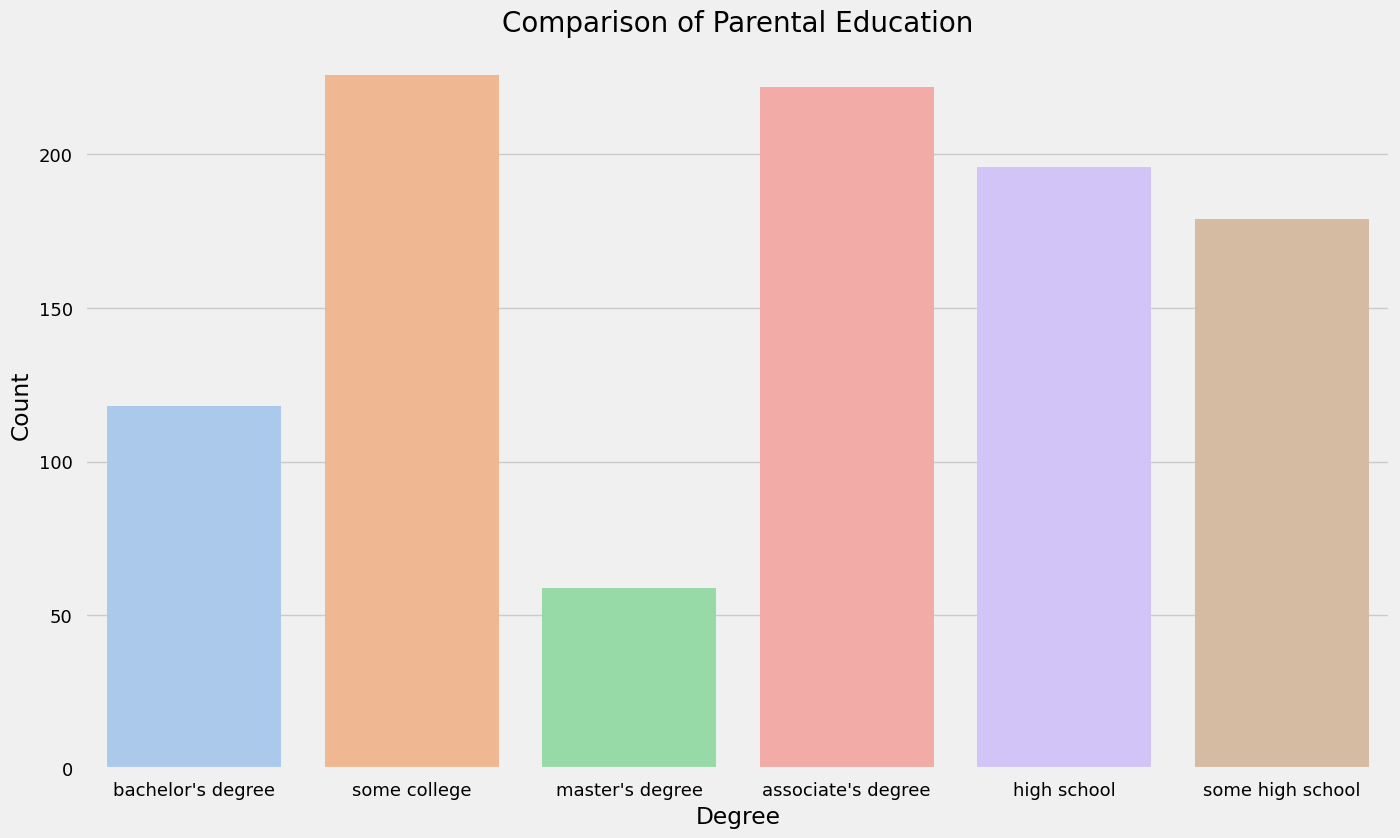

In [71]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=dataset['parental_level_of_education'], palette = 'pastel')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

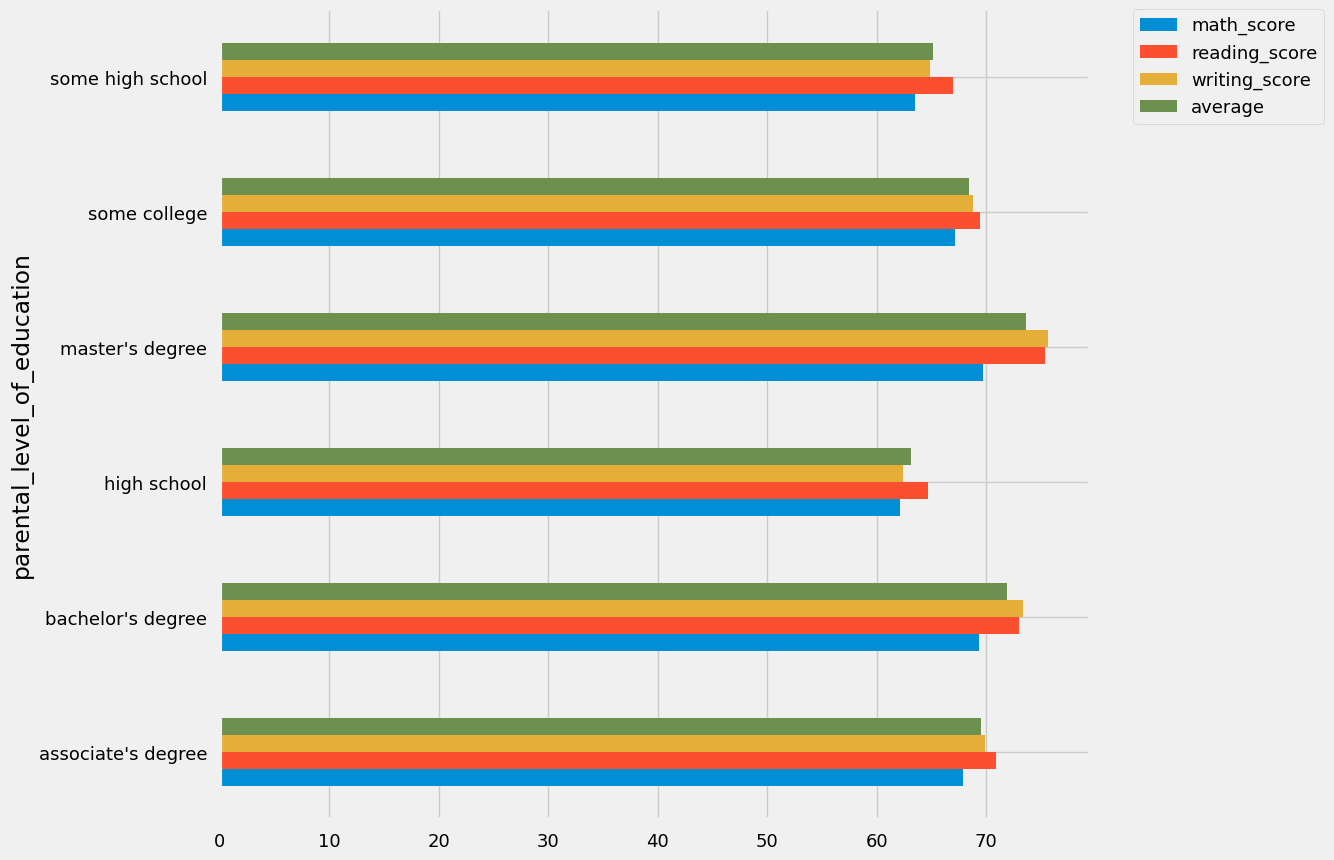

In [72]:
dataset.set_index('parental_level_of_education').groupby(level=0)[['math_score','reading_score','writing_score','average']].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

LUNCH Univariate

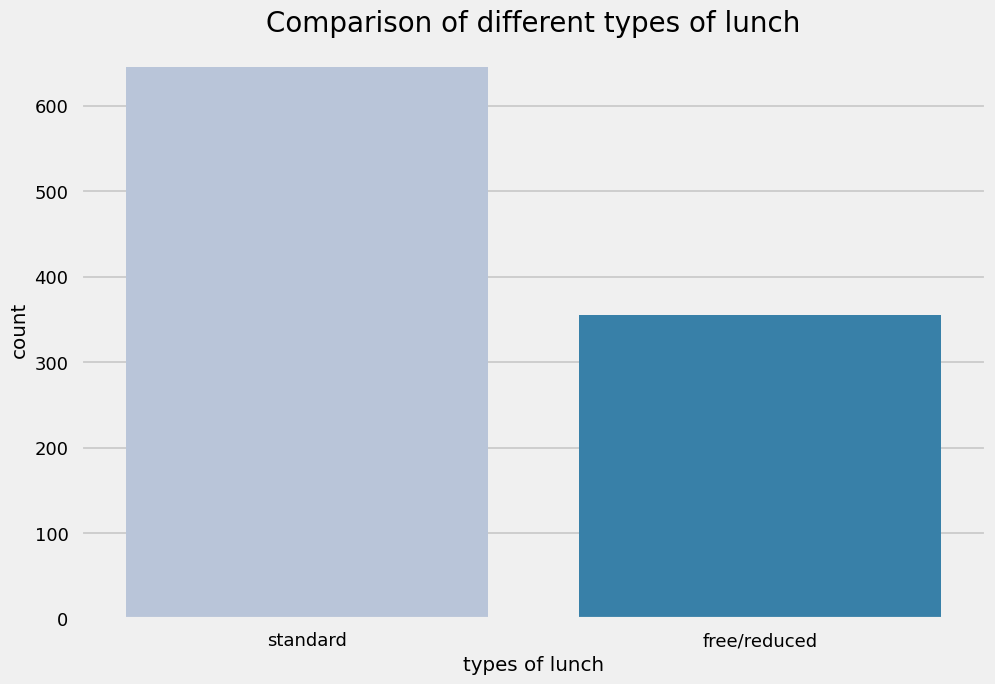

In [73]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(x=dataset['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

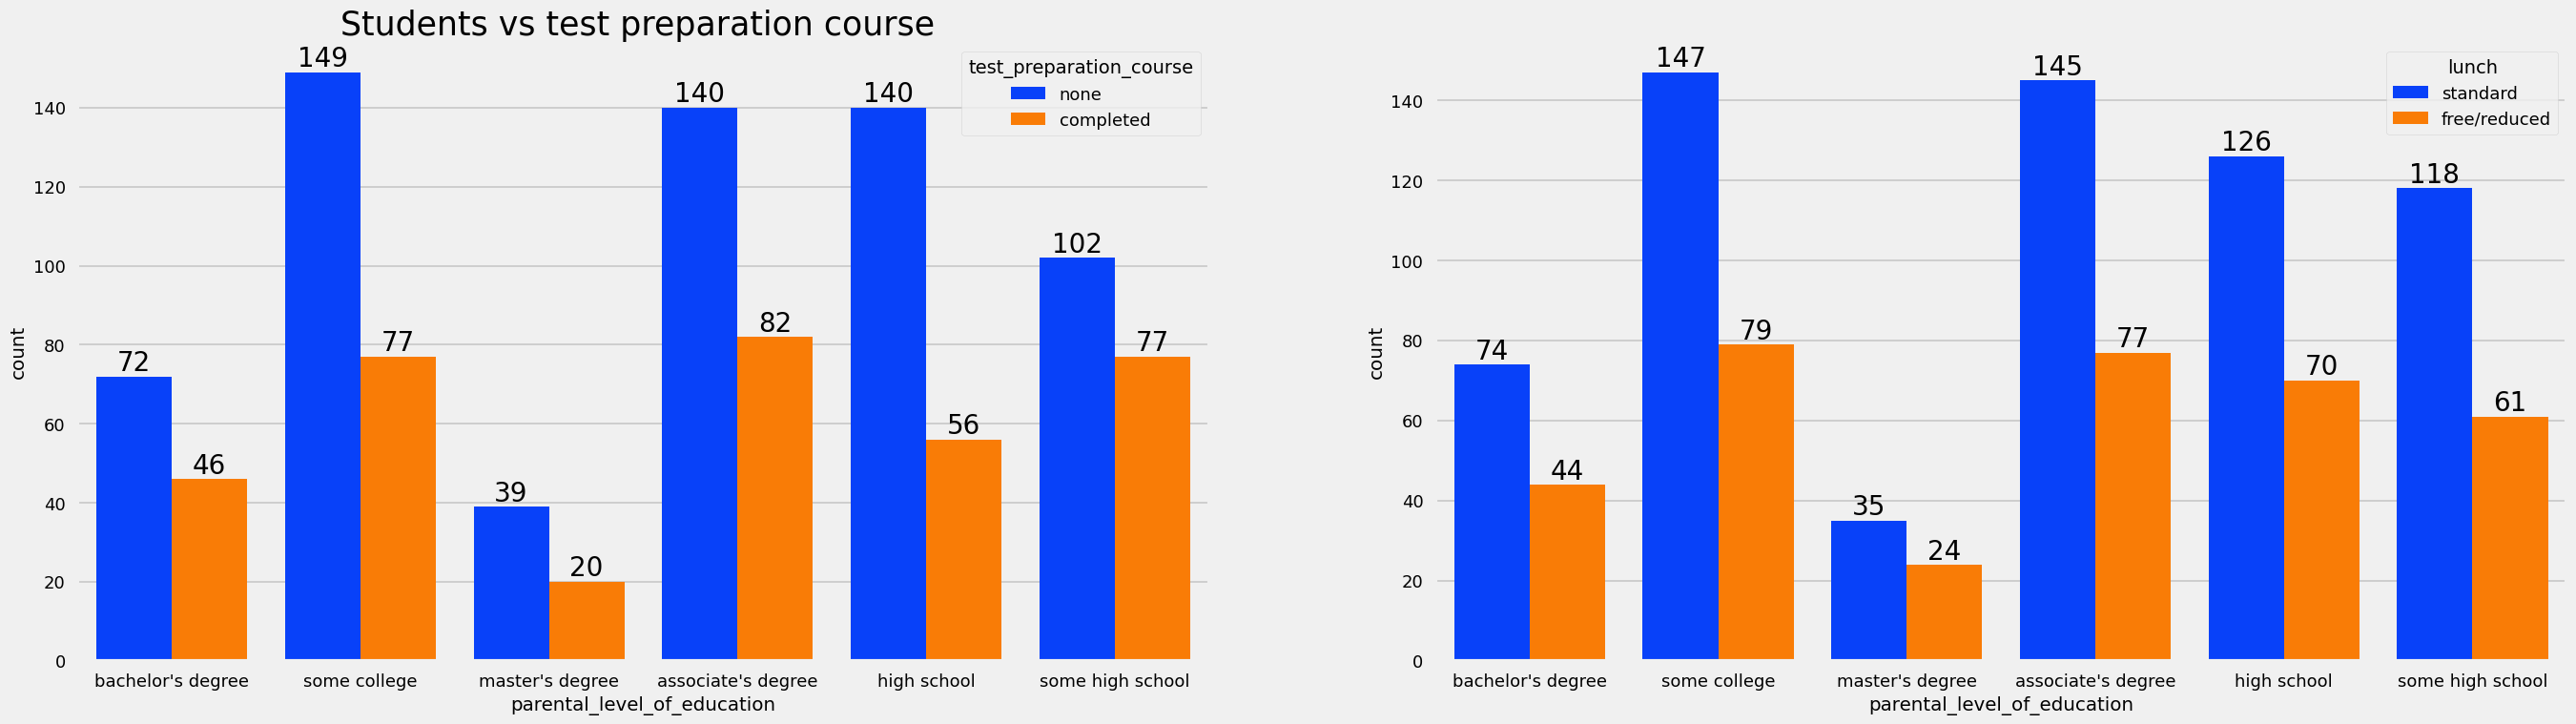

In [74]:
f,ax=plt.subplots(1,2,figsize=(30,8))
sns.countplot(x=dataset['parental_level_of_education'],data=dataset,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=dataset['parental_level_of_education'],data=dataset,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

<Axes: xlabel='lunch', ylabel='writing_score'>

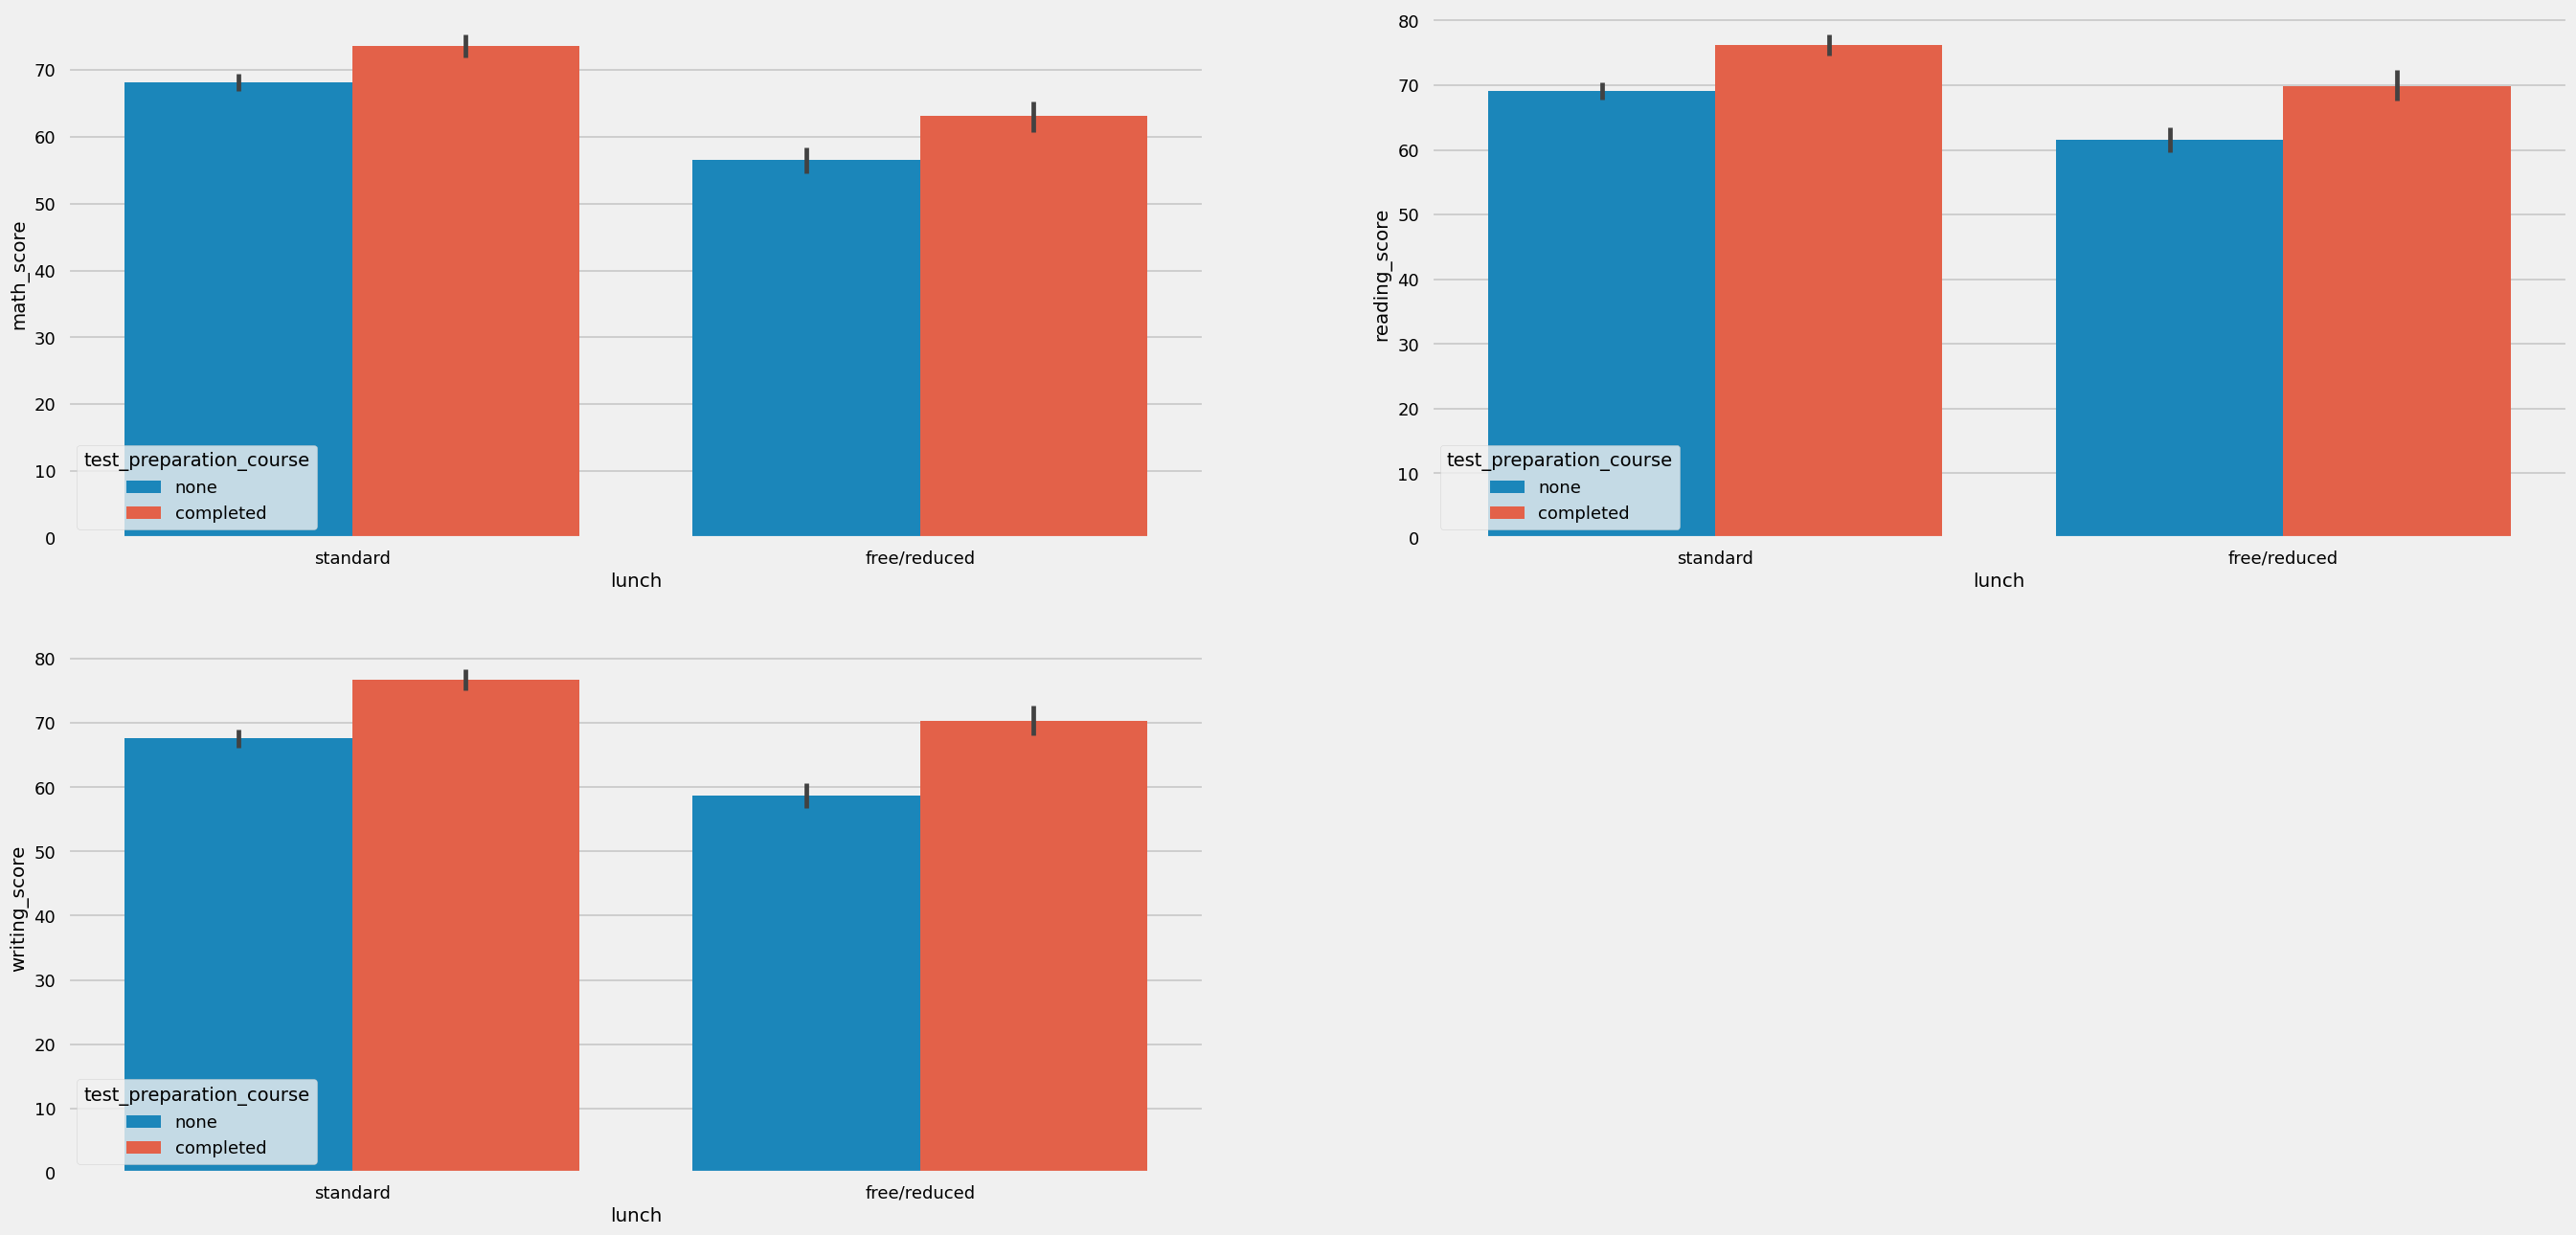

In [75]:
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
sns.barplot (x=dataset['lunch'], y=dataset['math_score'], hue=dataset['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=dataset['lunch'], y=dataset['reading_score'], hue=dataset['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=dataset['lunch'], y=dataset['writing_score'], hue=dataset['test_preparation_course'])

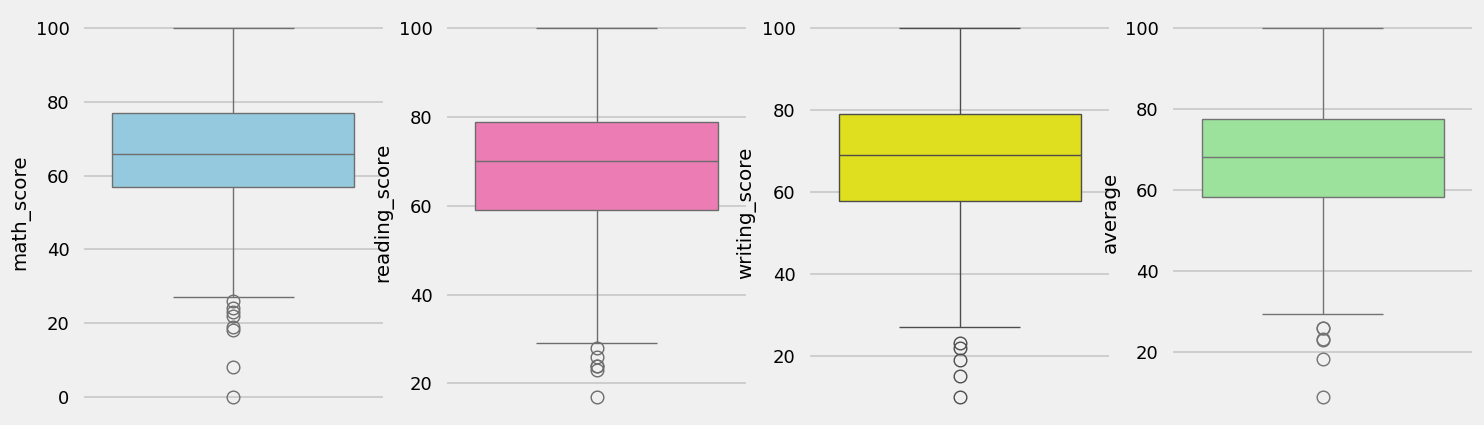

In [76]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(dataset['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(dataset['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(dataset['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(dataset['average'],color='lightgreen')
plt.show()

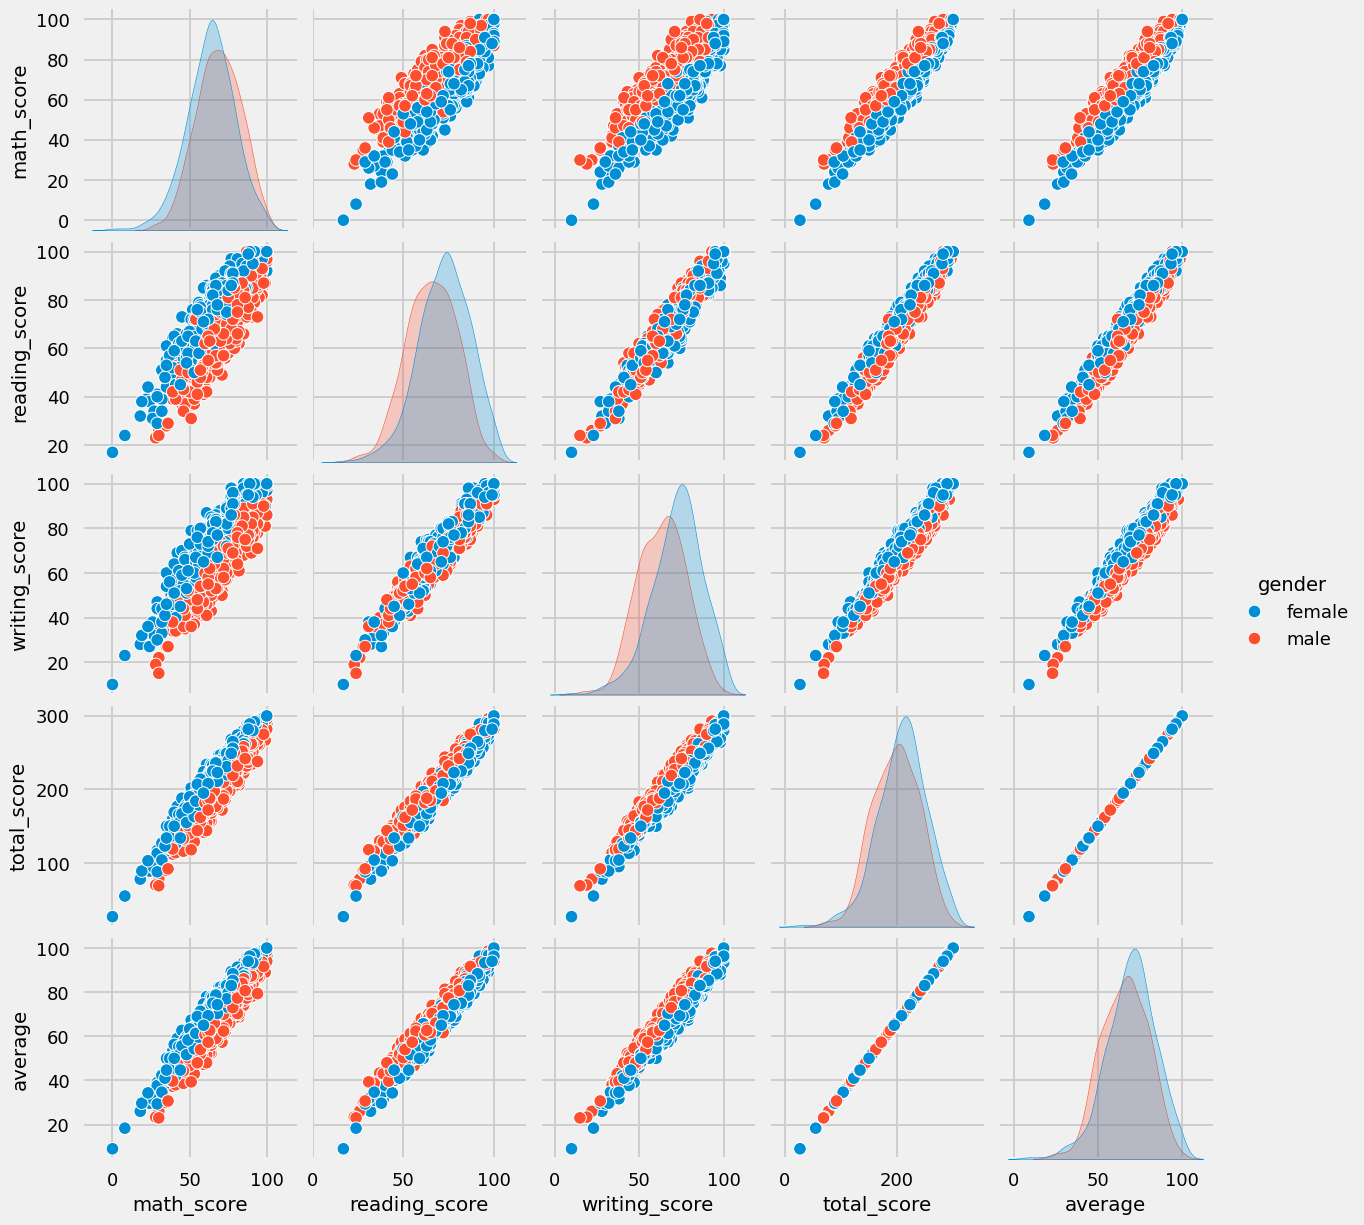

In [77]:
sns.pairplot(dataset,hue = 'gender')
plt.show()